# Analisi dell'Andamento degli Indici Azionari: S&P 500 & EURO STOXX 50

Questo notebook utilizza le funzioni definite nel modulo `src/analysis_tools.py` per analizzare i dati storici degli indici S&P 500 e EURO STOXX 50.

## 1. Import delle librerie e del modulo di analisi

In [1]:
import pandas as pd
import sys
sys.path.append('../') # Permette di importare dal parent directory (la root del progetto)
from src import analysis_tools as tools

%matplotlib inline
pd.set_option('display.float_format', '{:.4f}'.format)

## 2. Caricamento e Preprocessing dei Dati

I dati vengono caricati dai file CSV locali e preprocessati per calcolare i rendimenti giornalieri e altre feature.

In [2]:
sp500_df = tools.load_and_preprocess_data('../data/sp500.csv')
euro50_df = tools.load_and_preprocess_data('../data/euro50.csv')

print("Dati S&P 500 caricati:")
display(sp500_df.head())

Dati S&P 500 caricati:


,Open,High,Low,Close,Volume,daily_return,Year,Month,Weekday
Date,,,,,,,,,
2014-04-16 04:00:00+00:00,154.9991,155.5590,154.3138,155.5506,105197000,0.0105,2014,4,Wednesday
2014-04-17 04:00:00+00:00,155.3417,156.2025,155.0743,155.7679,105255000,0.0014,2014,4,Thursday
2014-04-21 04:00:00+00:00,155.8097,156.3612,155.6175,156.3111,68329000,0.0035,2014,4,Monday
2014-04-22 04:00:00+00:00,156.4699,157.4476,156.3863,157.0214,85790000,0.0045,2014,4,Tuesday
2014-04-23 04:00:00+00:00,156.9630,157.0465,156.5284,156.6537,73869000,-0.0023,2014,4,Wednesday


## 3. Analisi e Visualizzazione

Eseguiamo le analisi definite nel nostro modulo e visualizziamo i risultati.

### Andamento Storico Prezzi e Volumi

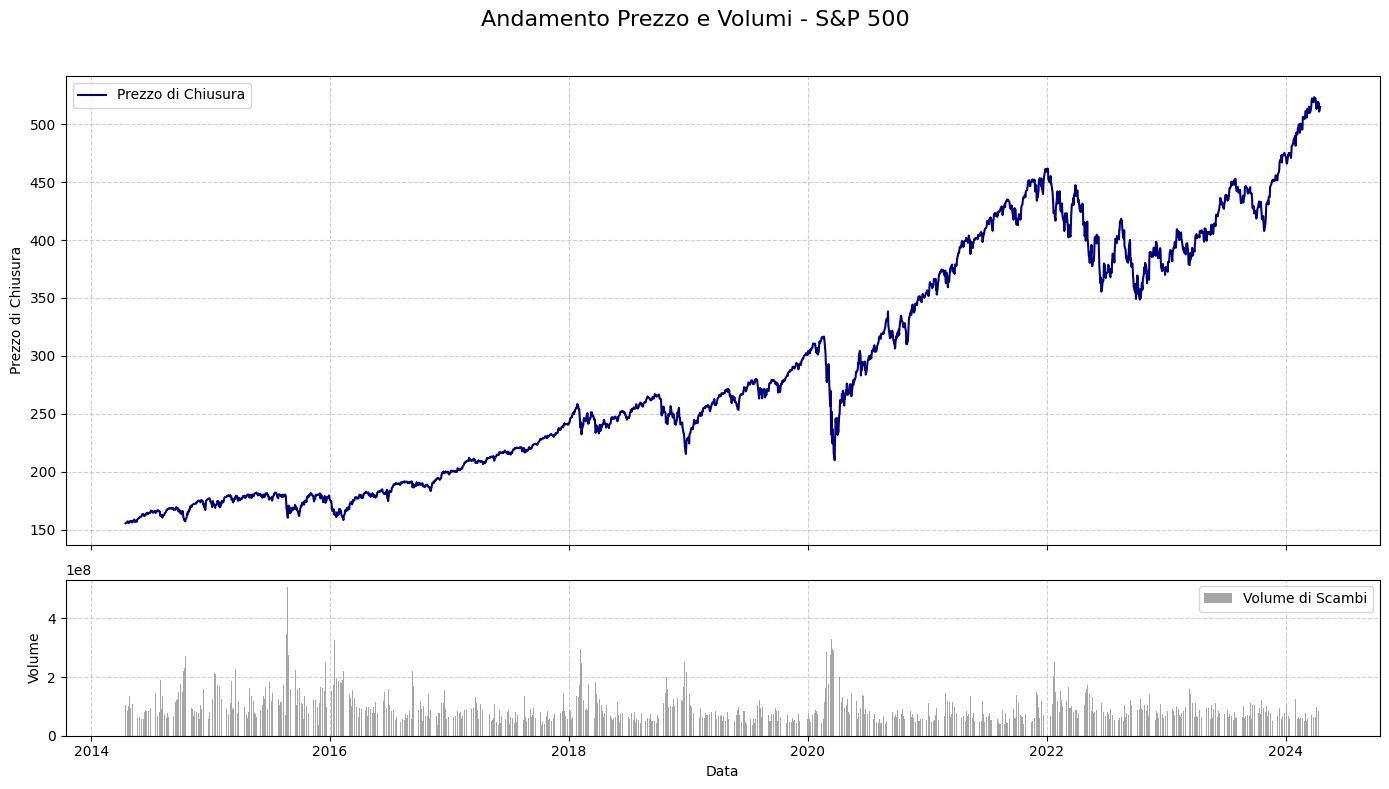

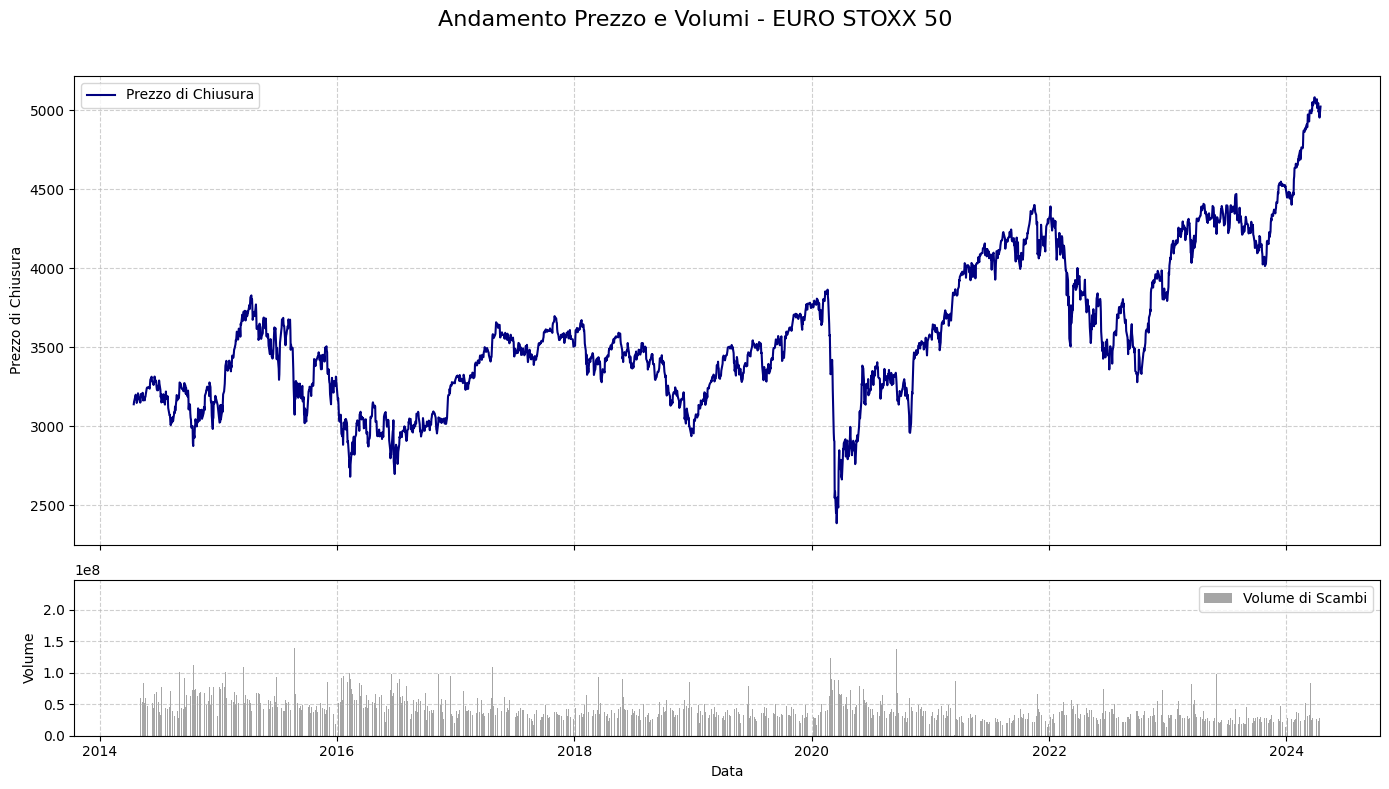

In [3]:
tools.plot_price_and_volume(sp500_df, 'S&P 500')
tools.plot_price_and_volume(euro50_df, 'EURO STOXX 50')

### Distribuzione dei Rendimenti Giornalieri

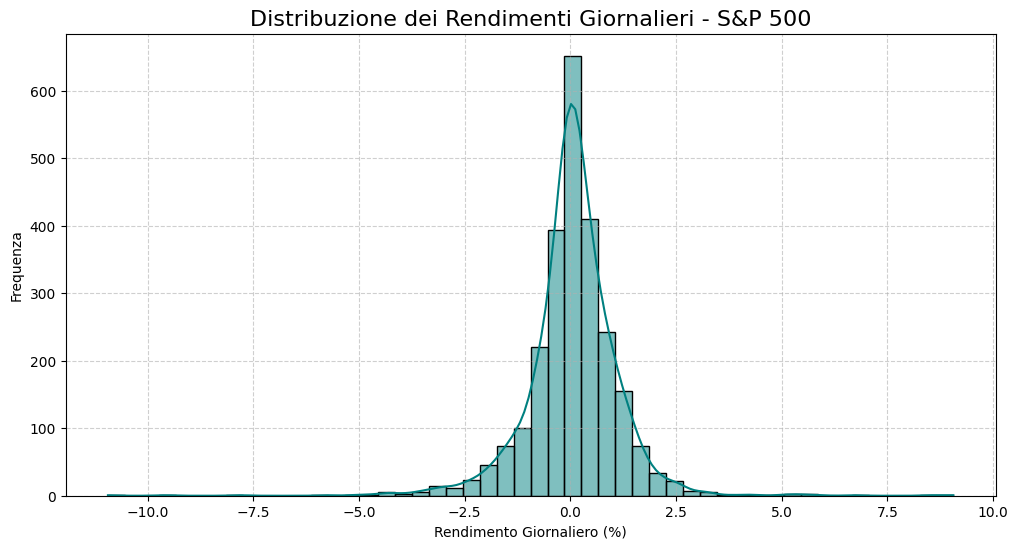

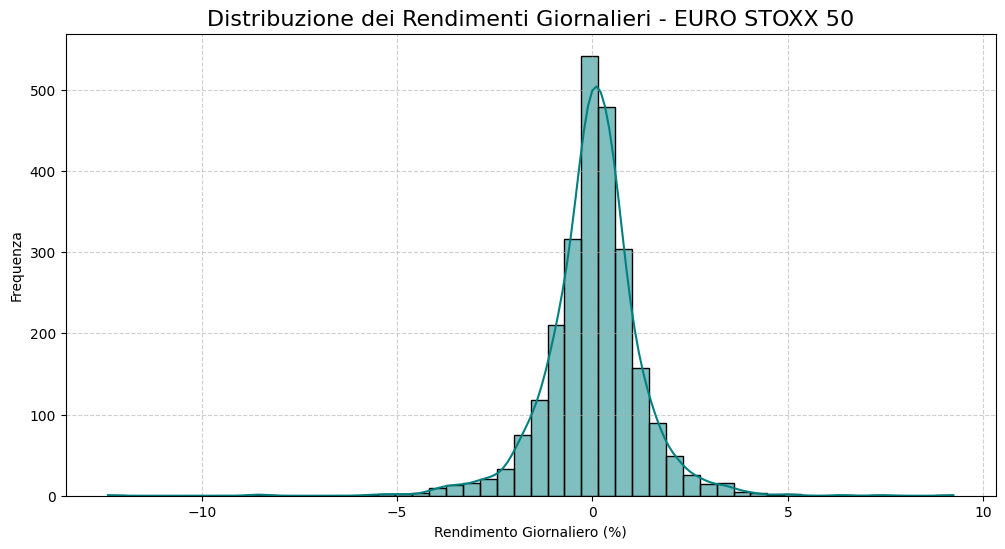

In [4]:
tools.plot_returns_histogram(sp500_df['daily_return'], 'S&P 500')
tools.plot_returns_histogram(euro50_df['daily_return'], 'EURO STOXX 50')

### Analisi dei Rendimenti Periodici

In [5]:
annual_returns_sp500 = tools.get_period_return(sp500_df['Close'], 'Y')
monthly_returns_sp500 = tools.get_period_return(sp500_df['Close'], 'M')

print("--- Rendimento Annuale S&P 500 (% a fine anno) ---")
display(annual_returns_sp500.to_frame(name='Annual Return %'))

--- Rendimento Annuale S&P 500 (% a fine anno) ---


/home/eugenix/Scrivania/Master DE-AI/1c. Data Engineer (ProfAI)/1. Python Data Toolkit (Numpy, Pandas, Pyplot)/Python_index_performance_analysis/Python_data_analysis_index_performance/notebooks/../src/analysis_tools.py:37: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return series.resample(period).apply(lambda x: (x[-1] / x[0]) - 1) * 100
/home/eugenix/Scrivania/Master DE-AI/1c. Data Engineer (ProfAI)/1. Python Data Toolkit (Numpy, Pandas, Pyplot)/Python_index_performance_analysis/Python_data_analysis_index_performance/notebooks/../src/analysis_tools.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return series.resample(period).apply(lambda x: (x[-1] / x[0]) - 1) * 100
/home/eugenix/Scrivania/Master DE-AI/1c. Data Engineer (ProfAI)/1. Python

,Annual Return %
Date,
2014-12-31 00:00:00+00:00,12.0912
2015-12-31 00:00:00+00:00,1.2885
2016-12-31 00:00:00+00:00,13.5858
2017-12-31 00:00:00+00:00,20.7814
2018-12-31 00:00:00+00:00,-5.2472
2019-12-31 00:00:00+00:00,31.0875
2020-12-31 00:00:00+00:00,17.2352
2021-12-31 00:00:00+00:00,30.5055
2022-12-31 00:00:00+00:00,-18.6464


### Performance per Giorno della Settimana

In [6]:
weekday_perf_sp500 = tools.analyze_weekday_performance(sp500_df['daily_return'])
print("--- Rendimento Medio per Giorno della Settimana S&P 500 (%) ---")
display(weekday_perf_sp500.to_frame(name='Avg Daily Return %'))

--- Rendimento Medio per Giorno della Settimana S&P 500 (%) ---


,Avg Daily Return %
Date,
Monday,0.0483
Tuesday,0.0516
Wednesday,0.0789
Thursday,0.0388
Friday,0.0520


### Giorni di Maggiore Volatilità

In [7]:
top_days_sp500, worst_days_sp500 = tools.find_extreme_days(sp500_df['daily_return'], n=5)

print("--- 5 Migliori Giorni S&P 500 (% rendimento) ---")
display(top_days_sp500.to_frame(name='Return %'))

print("--- 5 Peggiori Giorni S&P 500 (% rendimento) ---")
display(worst_days_sp500.to_frame(name='Return %'))

--- 5 Migliori Giorni S&P 500 (% rendimento) ---


,Return %
Date,
2020-03-24 04:00:00+00:00,9.0603
2020-03-13 04:00:00+00:00,8.5486
2020-04-06 04:00:00+00:00,6.7166
2020-03-26 04:00:00+00:00,5.8390
2022-11-10 05:00:00+00:00,5.4954


--- 5 Peggiori Giorni S&P 500 (% rendimento) ---


,Return %
Date,
2020-03-16 04:00:00+00:00,-10.9424
2020-03-12 04:00:00+00:00,-9.5677
2020-03-09 04:00:00+00:00,-7.8094
2020-06-11 04:00:00+00:00,-5.7649
2020-03-18 04:00:00+00:00,-5.0633
